## 🏥 Hospital Patient Data Analysis


## 📘 Overview

This project analyzes 1,000 hospital patient records from the year 2025.
The goal is to explore:

- Patient demographics
- Arrival and service distribution
- Length of stay
- Monthly patient trends
- Satisfaction scores
- Variability across services

This notebook demonstrates core data analysis skills needed for entry-level Data Analyst internships.

“The goal of this project is to analyze hospital patient patterns to help management improve operations, staffing, and service quality.”

This project analyzes 1,000 hospital patient records from 2025 to understand patient demographics, monthly arrival patterns, service performance, and satisfaction variability. I performed full data cleaning, feature engineering, exploratory analysis, visualization, and insight generation using Python. Key findings include strong seasonal trends (Aug–Oct peak), consistent satisfaction across services, and higher variability in ICU and Emergency. Recommendations focus on operational improvements such as staffing optimization, performance monitoring dashboards, and targeted satisfaction audits.

## 🧰 Tools Used
- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Jupyter Notebook


## 📥 Loading and Preparing the Data

In [97]:
import numpy as np;
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
path = "../Datasets/patients.csv"
df = pd.read_csv(path)

- Convert date columns + Add length of stay

In [99]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['departure_date'] = pd.to_datetime(df['departure_date'])
df['length_of_stay'] = (pd.to_datetime(df['departure_date']) - pd.to_datetime(df['arrival_date'])).dt.days

## ⭐ Satisfaction Classification

- A custom rule using mean ± standard deviation classifies each patient:

In [100]:
mean_satisfaction = df['satisfaction'].mean()
std_satisfaction = df['satisfaction'].std()
def classify_satisfaction(score):
    if score < mean_satisfaction - std_satisfaction:
        return 'Poor'
    elif score < mean_satisfaction:
        return 'Average'
    elif score < mean_satisfaction + std_satisfaction:
        return 'Good'
    else:
        return 'Excellent'

df['satisfaction_level'] = df['satisfaction'].apply(classify_satisfaction)

- Satisfaction Level Distribution

In [101]:
df['satisfaction_level'].value_counts()

satisfaction_level
Good         305
Average      276
Poor         219
Excellent    200
Name: count, dtype: int64

In [127]:
print("Duplicated Rows in the data sets :",df.duplicated().sum())
print("\nTotal No.of unique values in each column\n")
print(df.nunique())


Duplicated Rows in the data sets : 0

Total No.of unique values in each column

patient_id            1000
name                   993
age                     90
arrival_date           344
departure_date         337
service                  4
satisfaction            40
length_of_stay          14
satisfaction_level       4
dtype: int64


In [102]:
df.head()

,patient_id,name,age,arrival_date,departure_date,service,satisfaction,length_of_stay,satisfaction_level
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61,6,Poor
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83,1,Good
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83,6,Good
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81,11,Good
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76,7,Average


## 📊 Summary Statistics

In [103]:
round(df.describe(),2)

,age,arrival_date,departure_date,satisfaction,length_of_stay
count,1000.00,1000,1000,1000.00,1000.00
mean,45.34,2025-07-03 04:29:16.800000256,2025-07-10 14:15:21.600000256,79.60,7.41
min,0.00,2025-01-02 00:00:00,2025-01-06 00:00:00,60.00,1.00
25%,23.00,2025-04-05 18:00:00,2025-04-13 00:00:00,70.00,4.00
50%,46.00,2025-07-07 00:00:00,2025-07-14 00:00:00,80.00,7.00
75%,68.00,2025-09-30 00:00:00,2025-10-09 00:00:00,89.25,11.00
max,89.00,2025-12-31 00:00:00,2026-01-13 00:00:00,99.00,14.00
std,26.00,NaN,NaN,11.55,3.95


In [104]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   patient_id          1000 non-null   object        
 1   name                1000 non-null   object        
 2   age                 1000 non-null   int64         
 3   arrival_date        1000 non-null   datetime64[ns]
 4   departure_date      1000 non-null   datetime64[ns]
 5   service             1000 non-null   object        
 6   satisfaction        1000 non-null   int64         
 7   length_of_stay      1000 non-null   int64         
 8   satisfaction_level  1000 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 269.6 KB


In [105]:
df.nunique().reset_index()

,index,0
0,patient_id,1000
1,name,993
2,age,90
3,arrival_date,344
4,departure_date,337
5,service,4
6,satisfaction,40
7,length_of_stay,14
8,satisfaction_level,4


## 📈 Distribution Analysis
- Histograms for Age, Length of Stay, Satisfaction

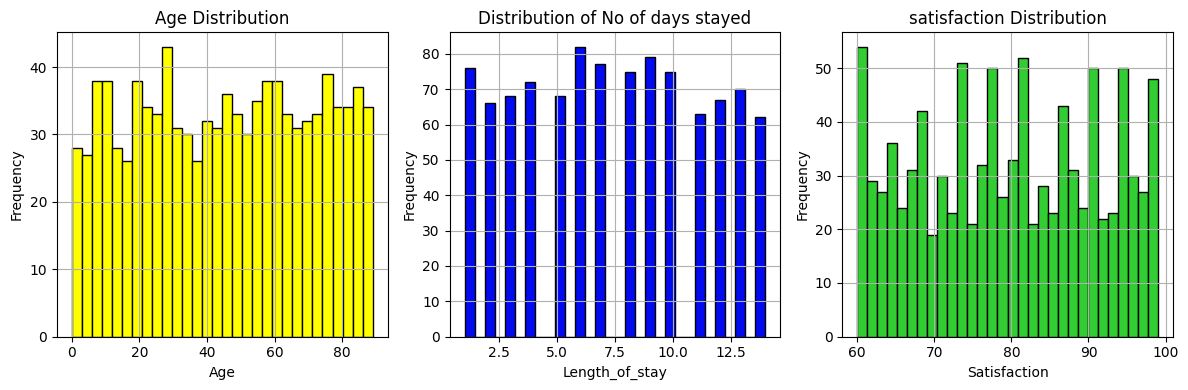

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

ax[0].hist(df['age'],bins=30, color='Yellow', edgecolor='black')
ax[0].set_title("Age Distribution")

ax[1].hist(df['length_of_stay'],bins=30, color="#020AF0", edgecolor='black')
ax[1].set_title("Distribution of No of days stayed")

ax[2].hist(df['satisfaction'],bins=30, color='#32CD32', edgecolor='black')
ax[2].set_title("satisfaction Distribution")

cols = ['Age','Length_of_stay','Satisfaction']
for i, col in enumerate(cols):
    ax[i].grid(True)
    ax[i].set_ylabel('Frequency')
    ax[i].set_xlabel(col)
   
plt.tight_layout()
plt.show()


## 🎨 Satisfaction Level Visualization


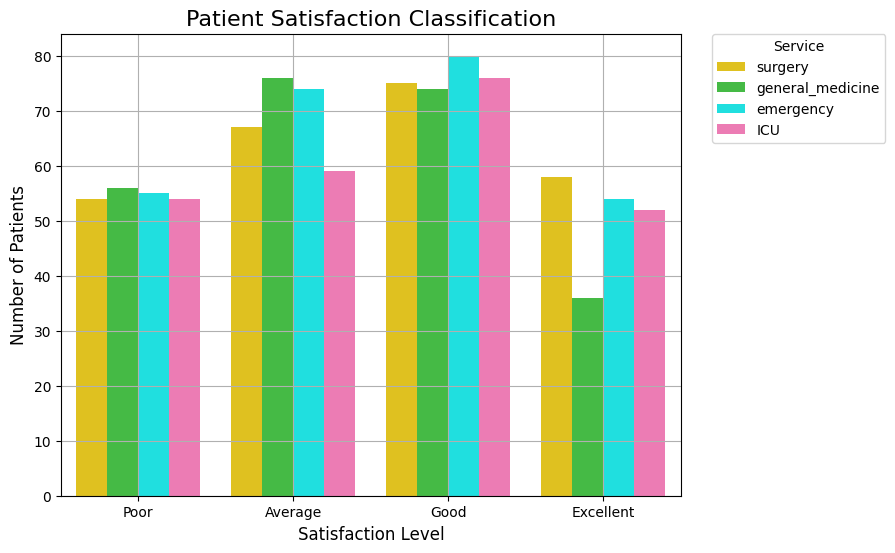

In [107]:
service_colors = {
    'emergency': '#00FFFF',        
    'ICU': '#FF69B4',              
    'surgery': '#FFD700',          
    'general_medicine': '#32CD32'  
}

plt.figure(figsize=(8, 6))
sns.countplot(x='satisfaction_level', 
              data=df, 
              hue='service',
              order=['Poor', 'Average', 'Good', 'Excellent'],
              palette=service_colors
              )
plt.title('Patient Satisfaction Classification', fontsize=16)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(
    title='Service',
    bbox_to_anchor=(1.05, 1),   # position legend outside
    loc='upper left',
    borderaxespad=0
)
plt.grid(True)
plt.show()



## 📅 Monthly Patient Trends
- Resample monthly arrivals


In [108]:
resample = df.resample("ME", on='arrival_date').agg(
    Total_people_joined=("name", "count")
).reset_index()
resample['month_year'] = resample['arrival_date'].dt.strftime('%b %Y')
resample

,arrival_date,Total_people_joined,month_year
0,2025-01-31,85,Jan 2025
1,2025-02-28,80,Feb 2025
2,2025-03-31,75,Mar 2025
3,2025-04-30,81,Apr 2025
4,2025-05-31,85,May 2025
5,2025-06-30,81,Jun 2025
6,2025-07-31,82,Jul 2025
7,2025-08-31,88,Aug 2025
8,2025-09-30,94,Sep 2025
9,2025-10-31,92,Oct 2025


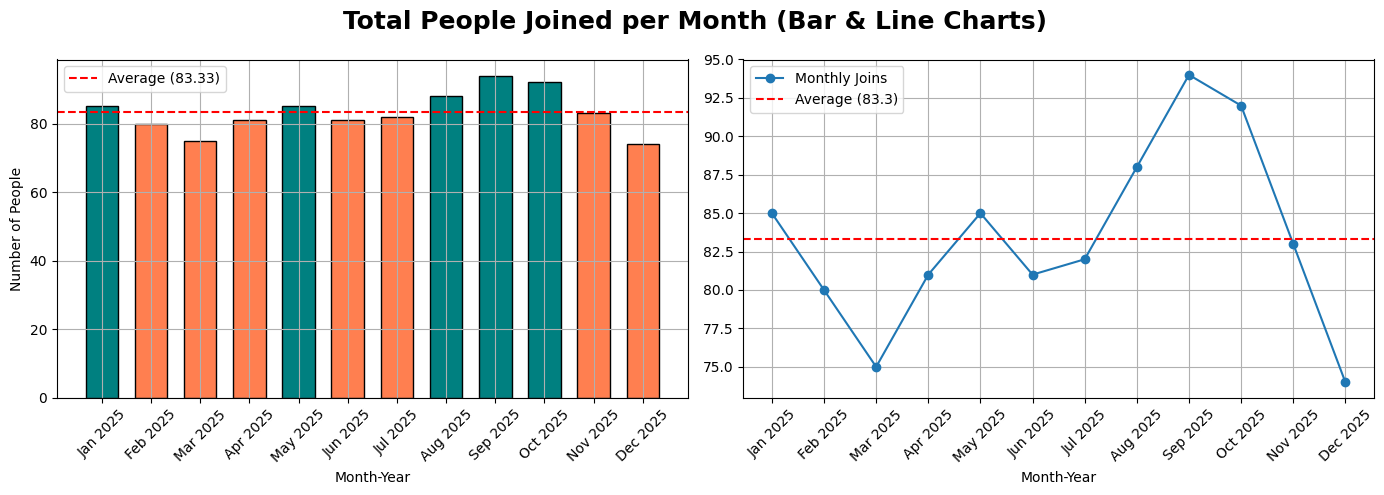

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

mean_val = resample['Total_people_joined'].mean()

# --- Bar Chart ---
ax[0].bar(
    resample['month_year'],
    resample['Total_people_joined'],
    color=['teal' if val > mean_val else 'coral' for val in resample['Total_people_joined']],
    width=0.66,
    edgecolor='black'
)

ax[0].axhline(mean_val, color="red", linestyle='--', label=f'Average ({mean_val:.2f})')


ax[0].set_xlabel('Month-Year')
ax[0].set_ylabel('Number of People')
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend()
ax[0].grid(True)

# --- Line Chart ---
ax[1].plot(resample['month_year'], resample['Total_people_joined'],
           marker='o', label='Monthly Joins')

ax[1].axhline(mean_val, color="red", linestyle='--', label=f'Average ({mean_val:.1f})')


ax[1].set_xlabel('Month-Year')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend()
ax[1].grid(True)
fig.suptitle("Total People Joined per Month (Bar & Line Charts)", fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()


“August to October have the highest patient volume, indicating peak season. Staff capacity should be increased during these months.”


## 🏥 Service-Wise Monthly Distribution

<Figure size 1400x600 with 0 Axes>

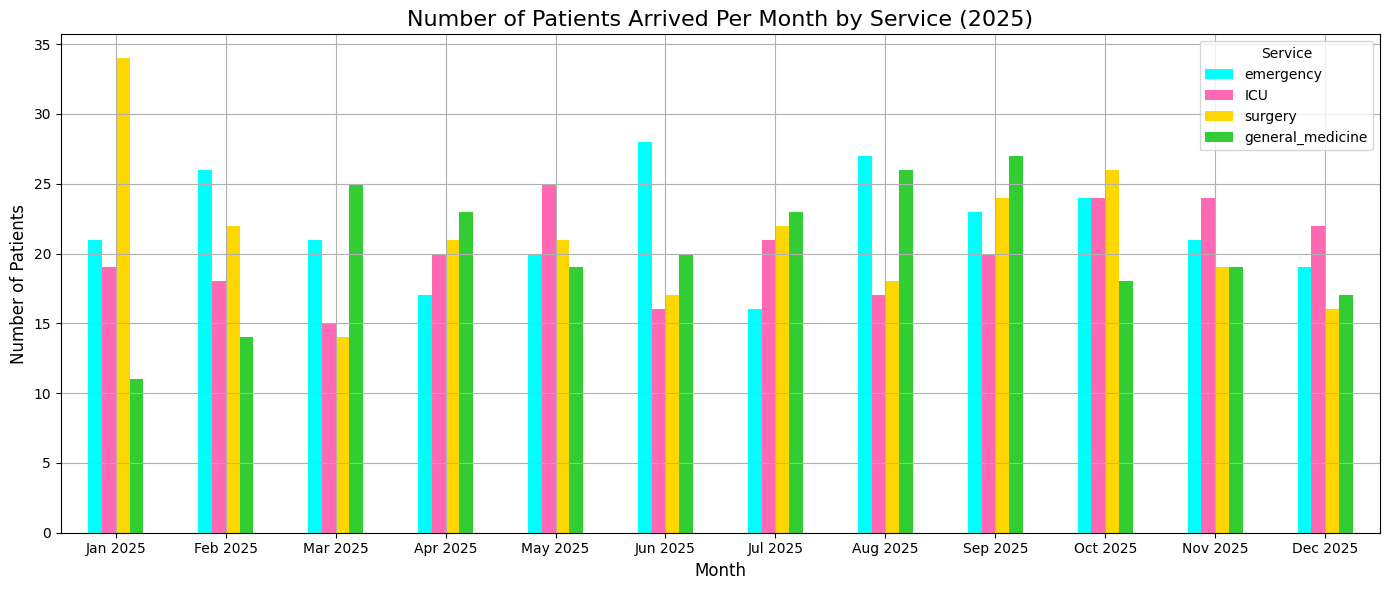

In [110]:

monthly_service_counts = (
    df.groupby([df['arrival_date'].dt.to_period('M'), 'service'])
      .size()
      .unstack(fill_value=0)
)

service_colors = {
    'emergency': '#00FFFF',
    'ICU': '#FF69B4',
    'surgery': '#FFD700',
    'general_medicine': '#32CD32'
}

monthly_service_counts.index = (
    monthly_service_counts.index.to_timestamp().strftime('%b %Y')
)

monthly_service_counts = monthly_service_counts[service_colors.keys()]

plt.figure(figsize=(14, 6))
monthly_service_counts.plot(
    kind='bar',
    figsize=(14, 6),
    color=[service_colors[col] for col in monthly_service_counts.columns]
)

plt.title("Number of Patients Arrived Per Month by Service (2025)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.legend(title="Service")
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 📊 Total People Joined per Service Analysis

In [111]:
group = df.groupby('service').agg(
    count = ('patient_id','count')
).reset_index()
group

,service,count
0,ICU,241
1,emergency,263
2,general_medicine,242
3,surgery,254


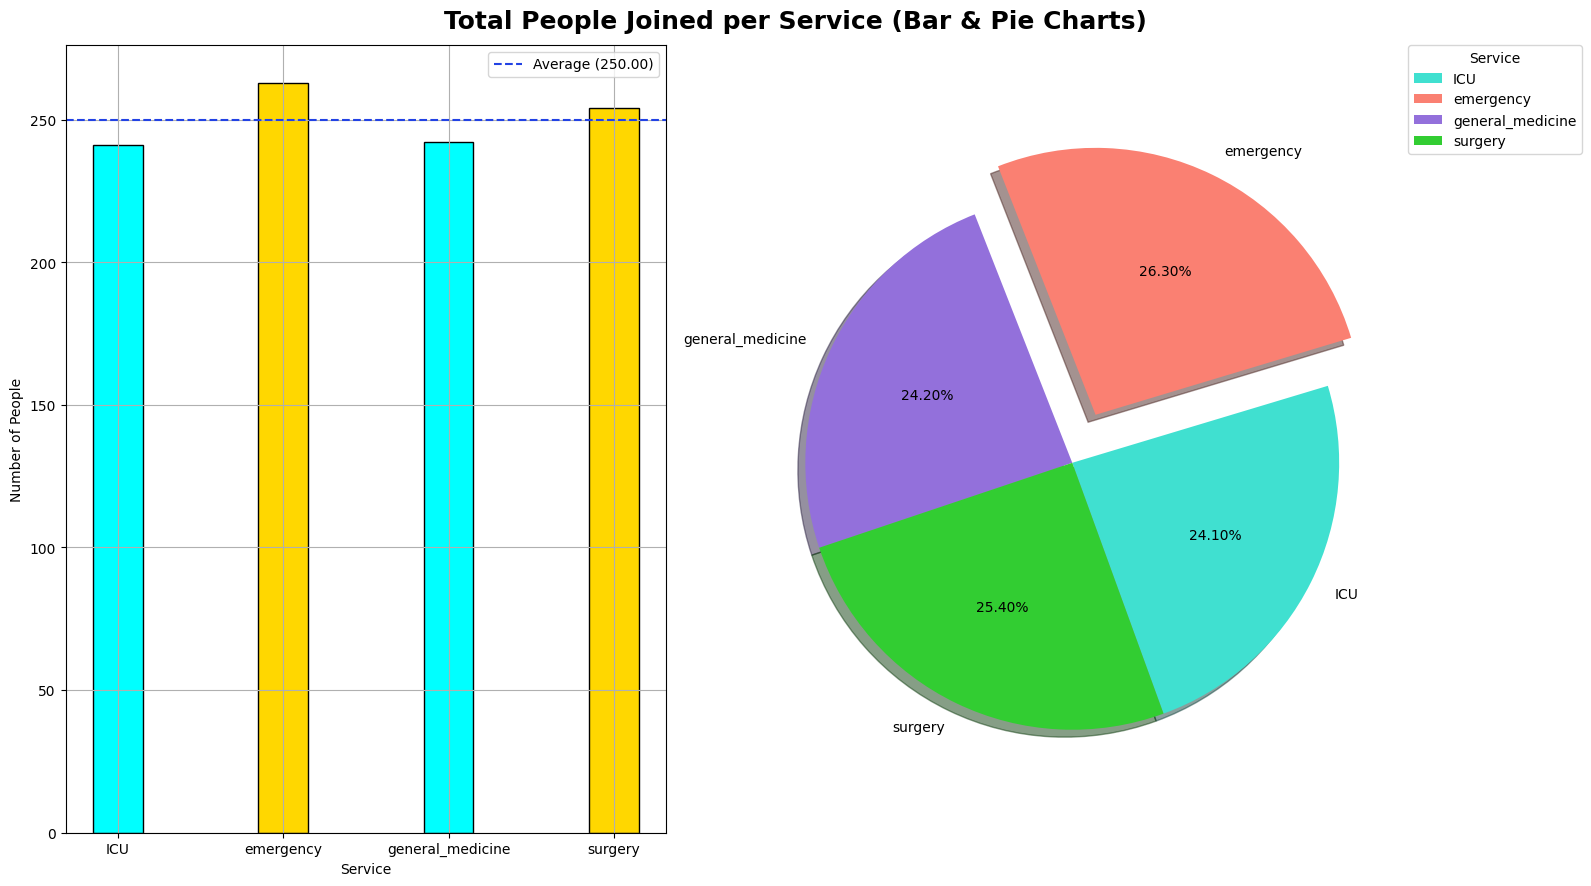

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(16, 9))

# === BAR CHART ===
mean_val = group['count'].mean()

ax[0].bar(
    group['service'],
    group['count'],
    color=['#FFD700' if val > mean_val else '#00FFFF' for val in group['count']],
    width=0.3,
    edgecolor='black'
)

ax[0].axhline(mean_val, color="#2242E4", linestyle='--', label=f'Average ({mean_val:.2f})')


ax[0].set_xlabel('Service')
ax[0].set_ylabel('Number of People')
ax[0].legend()
ax[0].grid(True)

# === PIE CHART ===
colors = ["#40E0D0", '#FA8072', '#9370DB', '#32CD32']
explode = [0, 0.2, 0, 0]

ax[1].pie(
    group['count'],
    labels=group['service'],
    autopct='%.2f%%',
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=290
)

ax[1].axis('equal')
fig.suptitle("Total People Joined per Service (Bar & Pie Charts)", fontsize=18, fontweight='bold')


ax[1].legend(
    group['service'],
    title='Service',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()


## 📈 Service-wise Satisfaction Analysis

In [113]:
group = df.groupby('service').agg(
    max_satisfaction=('satisfaction','max'),
    avg_satisfaction=('satisfaction','mean'),
    min_satisfaction=('satisfaction','min')
).sort_values(by='avg_satisfaction',ascending=False).reset_index()
group

,service,max_satisfaction,avg_satisfaction,min_satisfaction
0,surgery,99,80.314961,60
1,ICU,99,79.921162,60
2,emergency,99,79.547529,60
3,general_medicine,99,78.574380,60


## 📌 Key Observations
- All services share the same minimum score (60) — suggesting a uniform baseline of dissatisfaction cases.
- Max satisfaction is identical (99) across all services, showing the potential to achieve very high satisfaction regardless of service type.
- The difference between top and bottom average satisfaction is small (1.74 points), indicating overall consistent patient experience.

## 🔍 Correlation Analysis

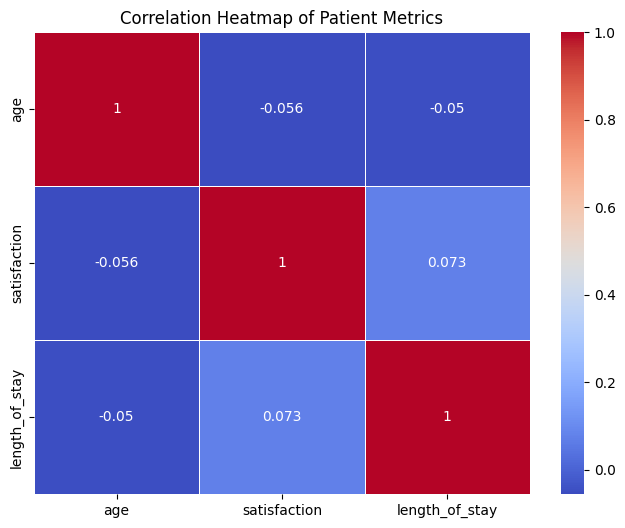

In [129]:

df['length_of_stay'] = (df['departure_date'] - df['arrival_date']).dt.days

corr = df[['age', 'satisfaction', 'length_of_stay']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Patient Metrics")
plt.show()


## 📦 Variability of Satisfaction by Service

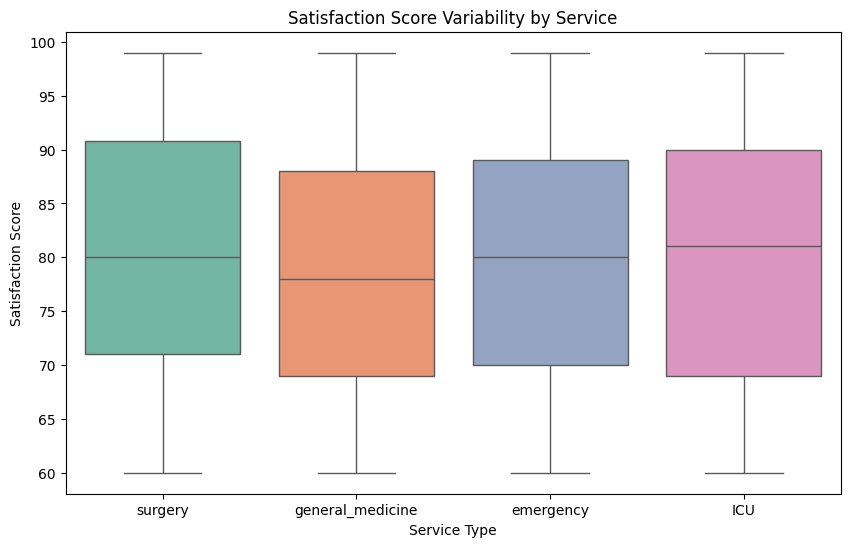

In [115]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='service',
    y='satisfaction',
    data=df,
    hue='service',
    palette='Set2',
    legend=False
)
plt.title("Satisfaction Score Variability by Service")
plt.xlabel("Service Type")
plt.ylabel("Satisfaction Score")
plt.show()



## 📝 Final Summary

- Monthly patient volume peaks from Aug–Oct 2025.
- Emergency and Surgery receive the highest number of patients.
- Average satisfaction is 79.6, with a range of 60–99.
- ICU and Emergency show the highest variability in satisfaction.
- Length of stay averages 7.4 days.
- Age distribution is wide (0–89 years), indicating a diverse patient base.

## 🎯 Recommendations

- Increase staff and resource allocation during peak months (Aug–Oct).
- Investigate low or highly variable satisfaction in ICU and Emergency.
- Implement service-level performance dashboards for monitoring.
- Reduce patient wait times in high-traffic services to improve satisfaction.
- Track repeat patients and high-risk groups with longer stays.